In [1]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models, layers
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

# Load data from CSV (replace with your actual file path)
data = pd.read_csv(r"C:\Users\SIYATH MSM\OneDrive\Desktop\AI\datasets.csv")

# Extract samples and features
samples = data["species"]
features = data[["area", "angle", "ratio"]]

x_train, x_test, y_train, y_test = train_test_split(features, samples, test_size=0.3, random_state=42)

# Vectorize features
def vectorize_features(features, dimension=3):
    results = np.zeros((len(features), dimension))
    for i, row in enumerate(features.values):
        for feature_index in range(dimension):  # Assume feature indices are 0, 1, 2
            results[i, feature_index] = row[feature_index]
    return results

x_train = vectorize_features(features, dimension=3)

# Prepare labels (assuming labels are already encoded)
y_train = np.array(data["species"])

y_test_encoded = to_categorical(y_test, num_classes=4)

# Define and compile the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(3,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Split data into training and validation sets
x_val = x_train[:70]
partial_x_train = x_train[70:]
y_val = y_train[:70]
partial_y_train = y_train[70:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
1/1 [==============================] - 1s 600ms/step - loss: 104.4852 - accuracy: 0.0000e+00 - val_loss: 46.7975 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 45ms/step - loss: 44.6631 - accuracy: 0.0000e+00 - val_loss: 33.1482 - val_accuracy: 0.0857
Epoch 3/30
1/1 [==============================] - 0s 34ms/step - loss: 30.7509 - accuracy: 0.2000 - val_loss: 25.0230 - val_accuracy: 0.2571
Epoch 4/30
1/1 [==============================] - 0s 32ms/step - loss: 23.8890 - accuracy: 0.3000 - val_loss: 12.3693 - val_accuracy: 0.2286
Epoch 5/30
1/1 [==============================] - 0s 32ms/step - loss: 11.9424 - accuracy: 0.3000 - val_loss: 18.1905 - val_accuracy: 0.3429
Epoch 6/30
1/1 [==============================] - 0s 34ms/step - loss: 19.8267 - accuracy: 0.3000 - val_loss: 16.5088 - val_accuracy: 0.3429
Epoch 7/30
1/1 [==============================] - 0s 31ms/step - loss: 18.3803 - accuracy: 0.3000 - val_loss: 8.5638 - val_accuracy: 0.4429


In [2]:
predictions = model.predict(x_test)
predictions[0].shape

1/1 [==============================] - 0s 92ms/step


(8,)

In [3]:
np.sum(predictions[0])

0.99999994

In [4]:
np.argmax(predictions[0])

2

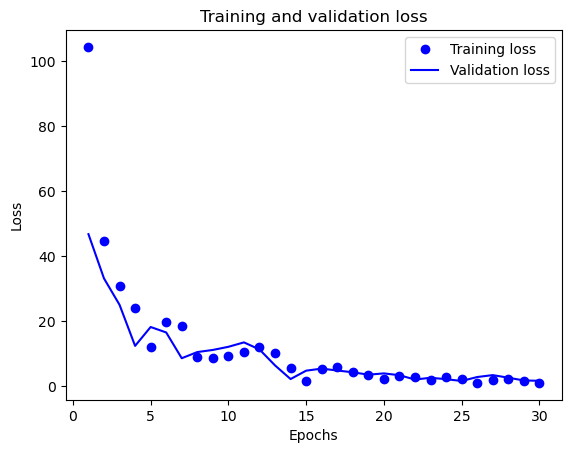

In [5]:
import matplotlib.pyplot as plt

# Assuming you have the correct history_dict with 'val_loss' values
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)  # Adjust the range based on the actual number of epochs

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


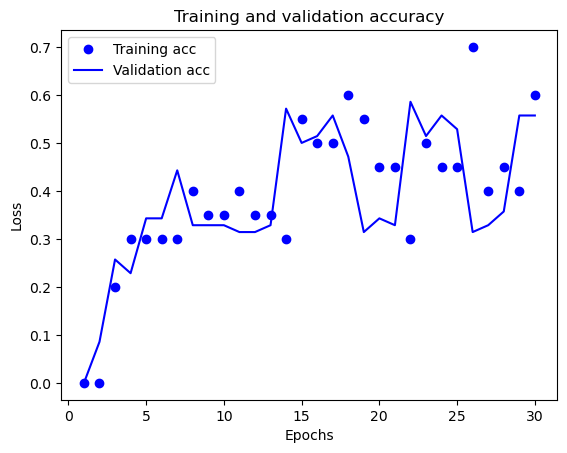

In [6]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models, layers
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint  # Add these imports

# Load data from CSV (replace with your actual file path)
data = pd.read_csv(r"C:\Users\SIYATH MSM\OneDrive\Desktop\AI\datasets.csv")

# Extract samples and features
samples = data["species"]
features = data[["area", "angle", "ratio"]]

x_train, x_test, y_train, y_test = train_test_split(features, samples, test_size=0.3, random_state=42)

# Vectorize features
def vectorize_features(features, dimension=3):
    results = np.zeros((len(features), dimension))
    for i, row in enumerate(features.values):
        for feature_index in range(dimension):  # Assume feature indices are 0, 1, 2
            results[i, feature_index] = row[feature_index]
    return results

x_train = vectorize_features(features, dimension=3)

# Prepare labels (assuming labels are already encoded)
y_train = np.array(data["species"])

y_test_encoded = to_categorical(y_test, num_classes=4)

# Define and compile the model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(3,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath='best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)

# Split data into training and validation sets
x_val = x_train[:70]
partial_x_train = x_train[70:]
y_val = y_train[:70]
partial_y_train = y_train[70:]

# Fit the model with the callbacks
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 52.1875 - accuracy: 0.3500
Epoch 1: val_loss improved from inf to 35.34657, saving model to best_model.h5
1/1 [==============================] - 1s 660ms/step - loss: 52.1875 - accuracy: 0.3500 - val_loss: 35.3466 - val_accuracy: 0.3000
Epoch 2/30
1/1 [==============================] - ETA: 0s - loss: 33.6149 - accuracy: 0.3500
Epoch 2: val_loss improved from 35.34657 to 23.77882, saving model to best_model.h5
1/1 [==============================] - 0s 58ms/step - loss: 33.6149 - accuracy: 0.3500 - val_loss: 23.7788 - val_accuracy: 0.3286
Epoch 3/30
1/1 [==============================] - ETA: 0s - loss: 22.9913 - accuracy: 0.3500
Epoch 3: val_loss improved from 23.77882 to 6.05318, saving model to best_model.h5
1/1 [==============================] - 0s 53ms/step - loss: 22.9913 - accuracy: 0.3500 - val_loss: 6.0532 - val_accuracy: 0.3429
Epoch 4/30
1/1 [==============================] - ETA: 0s - loss: 6.4789 - accuracy: 

In [8]:
from keras.models import load_model

# Load the saved model
model = load_model('best_model.h5')

In [9]:
# Predict the probabilities for the test samples
predictions = model.predict(x_test[:10])

1/1 [==============================] - 0s 56ms/step


In [10]:
# Define class names (assuming you have a mapping or know the class names)
class_names = ['gliricidia sepium', 'phyllanthus acidus', 'magnolia virginiana']

In [11]:
print (len(class_names))

3


In [12]:
# Print the predicted class, probability, and class name for each of the first 10 samples
for i, prediction in enumerate(predictions):
    class_index = np.argmax(prediction)  # Find the index of the max probability
    max_probability = np.max(prediction)  # Find the max probability value
    class_label = class_index + 1  # Adjust class index if labels are 1-based
    class_name = class_names[class_index]  # Get the class name using the index
    print(f"Sample {i+1}: Max Probability = {max_probability:.4f}, Class Label = {class_label}, Class Name = {class_name}")

Sample 1: Max Probability = 0.5902, Class Label = 3, Class Name = magnolia virginiana
Sample 2: Max Probability = 0.9996, Class Label = 2, Class Name = phyllanthus acidus
Sample 3: Max Probability = 0.8849, Class Label = 3, Class Name = magnolia virginiana
Sample 4: Max Probability = 0.9995, Class Label = 2, Class Name = phyllanthus acidus
Sample 5: Max Probability = 0.9977, Class Label = 2, Class Name = phyllanthus acidus
Sample 6: Max Probability = 0.8020, Class Label = 3, Class Name = magnolia virginiana
Sample 7: Max Probability = 0.9996, Class Label = 2, Class Name = phyllanthus acidus
Sample 8: Max Probability = 0.9905, Class Label = 3, Class Name = magnolia virginiana
Sample 9: Max Probability = 0.9887, Class Label = 2, Class Name = phyllanthus acidus
Sample 10: Max Probability = 0.9997, Class Label = 2, Class Name = phyllanthus acidus


In [13]:
# Print the predicted classes with the maximum probability for each of the first 10 samples
for i, prediction in enumerate(predictions):
    max_probability = np.max(prediction)  # Find the max probability value
    # Find all indexes with the max probability
    max_indexes = np.flatnonzero(prediction == max_probability)
    # Loop through all max indexes to print each one
    for class_index in max_indexes:
        class_label = class_index + 1  # Adjust class index if labels are 1-based
        class_name = class_names[class_index]  # Get the class name using the index
        print(f"Sample {i+1}: Max Probability = {max_probability:.4f}, Class Label = {class_label}, Class Name = {class_name}")

Sample 1: Max Probability = 0.5902, Class Label = 3, Class Name = magnolia virginiana
Sample 2: Max Probability = 0.9996, Class Label = 2, Class Name = phyllanthus acidus
Sample 3: Max Probability = 0.8849, Class Label = 3, Class Name = magnolia virginiana
Sample 4: Max Probability = 0.9995, Class Label = 2, Class Name = phyllanthus acidus
Sample 5: Max Probability = 0.9977, Class Label = 2, Class Name = phyllanthus acidus
Sample 6: Max Probability = 0.8020, Class Label = 3, Class Name = magnolia virginiana
Sample 7: Max Probability = 0.9996, Class Label = 2, Class Name = phyllanthus acidus
Sample 8: Max Probability = 0.9905, Class Label = 3, Class Name = magnolia virginiana
Sample 9: Max Probability = 0.9887, Class Label = 2, Class Name = phyllanthus acidus
Sample 10: Max Probability = 0.9997, Class Label = 2, Class Name = phyllanthus acidus


In [14]:
# Function to load the model and predict a specific sample's class
def predict_sample_class(sample_index):

    # Ensure the sample index is within the bounds of the test dataset
    if sample_index < 0 or sample_index >= len(x_test):
        return "Invalid sample index. Please provide a valid index within the range of the dataset."
    
    print ('Range : ', sample_index, ':', sample_index+1)

    # Predict the probabilities for the specified sample
    prediction = model.predict(x_test[sample_index:sample_index+1])

    # Find the index of the max probability
    class_index = np.argmax(prediction)
    print (class_index)

    # Find the max probability value
    max_probability = np.max(prediction)

    # Adjust class index if labels are 1-based
    class_label = class_index + 1

    # Get the class name using the index
    class_name = class_names[class_index]

    # Print the output
    return f"Sample {sample_index}: Max Probability = {max_probability:.4f}, Class Label = {class_label}, Class Name = {class_name}"

In [15]:
# Example usage
sample_index = 3  # Change this to the index of the sample you want to analyze
output = predict_sample_class(sample_index)
print(output)

Range :  3 : 4
1/1 [==============================] - 0s 25ms/step
1
Sample 3: Max Probability = 0.9995, Class Label = 2, Class Name = phyllanthus acidus
